# **Linear Regression**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

plt.style.use('seaborn-v0_8')

In [3]:
df = pd.read_csv('/content/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns)
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)

df.describe()

Shape of dataset: (545, 13)

Columns:
 Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

Missing Values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Data Types:
 price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:

df = df.dropna()

X = df[['area', 'bedrooms', 'bathrooms']]
y = df['price']
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 436
Testing samples: 109


In [7]:

model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained successfully!")
print("\nIntercept (b0):", model.intercept_)
print("Coefficients (b1, b2, b3...):", model.coef_)

Model trained successfully!

Intercept (b0): 59485.379208717495
Coefficients (b1, b2, b3...): [3.45466570e+02 3.60197650e+05 1.42231966e+06]


In [8]:
#  Predict house prices on test data
y_pred = model.predict(X_test)

comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison.head()

,Actual,Predicted
316,4060000,6.383168e+06
77,6650000,6.230250e+06
360,3710000,3.597885e+06
90,6440000,4.289731e+06
493,2800000,3.930446e+06


In [9]:
#  Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Model Evaluation Metrics:
Mean Absolute Error (MAE): 1265275.6699454375
Mean Squared Error (MSE): 2750040479309.0522
R-squared (R²): 0.4559299118872445


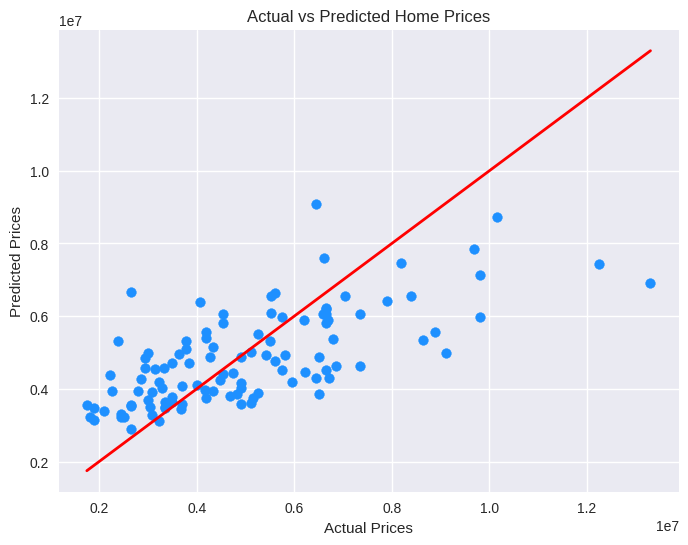

In [10]:
# Visualize predictions
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='dodgerblue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.title("Actual vs Predicted Home Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

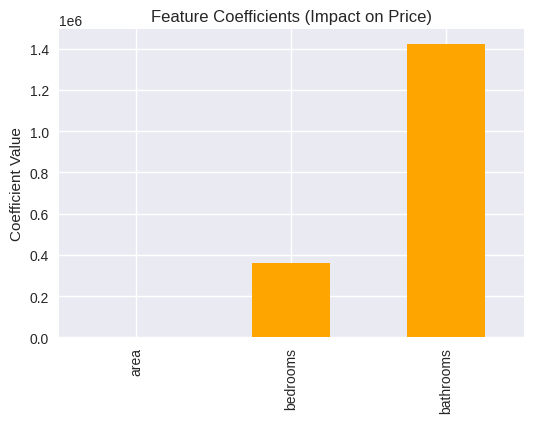

,Coefficient
area,3.454666e+02
bedrooms,3.601977e+05
bathrooms,1.422320e+06


In [11]:
#  Visualize feature importance
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df.plot(kind='bar', figsize=(6,4), legend=False, color='orange')
plt.title("Feature Coefficients (Impact on Price)")
plt.ylabel("Coefficient Value")
plt.show()

coeff_df

In [12]:
#  Interpretation
print("Intercept (b0):", model.intercept_)
for feature, coef in zip(X.columns, model.coef_):
    print(f"For every 1 unit increase in {feature}, predicted house price increases by approximately {coef:.2f} units (keeping other features constant).")

Intercept (b0): 59485.379208717495
For every 1 unit increase in area, predicted house price increases by approximately 345.47 units (keeping other features constant).
For every 1 unit increase in bedrooms, predicted house price increases by approximately 360197.65 units (keeping other features constant).
For every 1 unit increase in bathrooms, predicted house price increases by approximately 1422319.66 units (keeping other features constant).
